In [1]:
# import required packages
%cd /Users/namir_oues/Documents/PhD/MDSubSampler
import mdss.protein_data as prot
import mdss.geometrical_property as gp
import mdss.sampler as s
import mdss.dissimilarity as d
import mdss.utilities as u
import tempfile
import os
from IPython.display import Image, display

/Users/namir_oues/Documents/PhD/MDSubSampler


/Users/namir_oues/Library/Caches/pypoetry/virtualenvs/mdsubsampler-zr_osNU_-py3.9/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# set paths and all required arguments 
trajectory_file = "data/input.xtc"
topology_file = "data/input.gro"
atom_selection = "resid 120:160"
strata_number = 200
size = 10
dissimilarity_measure = d.Bhattacharyya
# set a temporary directory to save all output files 
temp_dir = tempfile.mkdtemp()

In [3]:
# create a protein data object
p_data = prot.ProteinData(trajectory_file,topology_file,config_parameters=None)

In [4]:
# create a protein property object
p_property = gp.RMSD(p_data, atom_selection, fit=True)

In [5]:
# calculate reference property for full trajectory
p_property.calculate_property()

In [6]:
# create uniform sampler object 
sampler = s.UniformSampler(
            protein_property=p_property,
            protein_data=p_data,
            output_folder=temp_dir,
            file_prefix='sc2',
            strata_number=strata_number,
            dissimilarity_measure=dissimilarity_measure)

In [7]:
# generate sampled property for specific sample size
sampled_property = sampler.sample(round(int(size) * p_data.n_frames / 100))

In [8]:
# generate trajectory and save output files in temporary directory
u.write_output_files(
    output_folder=temp_dir,
    file_prefix='sc2',
    p_prop=p_property,
    s_prop=sampled_property,
    p_data=p_data,
    p=size,
    machine_learning=None,
)

In [9]:
# generate plot and save file in temporary directory
u.plot_property(output_folder=temp_dir,
            file_prefix='sc2',
            p_prop=p_property,
            s_prop=sampled_property,
            p=size,)

<Figure size 640x480 with 0 Axes>

In [10]:
# check the output files generated in the temporary directory 
print(os.listdir(temp_dir))

['sc2_10_RMSD.dat', 'sc2_10_RMSD.xtc', 'sc2_10_RMSD.npy', 'sc2_10_RMSD_plot.png']


0 1.4744275129937738
366 1.59143542519017
531 1.6424979187898676
536 1.6588671378485005
29 1.6872463430482636
3 1.6939923090588904
32 1.7110401110195808
598 1.7238523269444865
543 1.733845444751941
5 1.7418306177822853
26 1.7501208894670455
525 1.7584436996800916
27 1.7677874393562811
38 1.7803317013967004
712 1.7890080288385204
458 1.7966169950739517
381 1.8045684574460619
14 1.8193994246403304
382 1.8286458673439172
367 1.8390623632798793
599 1.8445309781849653
586 1.8602963285069811
379 1.8670719898420711
578 1.877225827483348
459 1.8830992565806277
611 1.8971140191843576
13 1.8997606304507244
538 1.9114852788649328
710 1.9227058144804057
539 1.9346474708691423
522 1.9405627655107416
245 1.945689941708607
547 1.9571110862763603
452 1.972120428672439
435 1.9801436842498068
363 1.9879073881517522
413 1.9933679204865384
419 2.0047476947994296
307 2.0151080866421576
532 2.0217873242103086
555 2.0396751908278343
513 2.0452340004731937
595 2.0564832954346586
580 2.0633913967656277
707 2.0

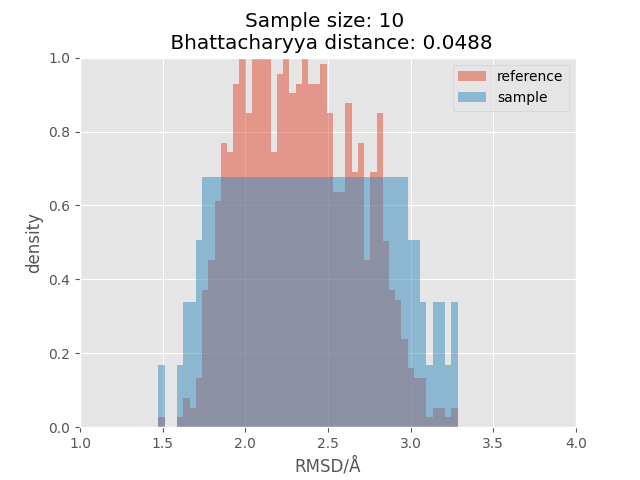

In [11]:
# display table with calculated property for sample size and distribution plot
for fname in os.listdir(temp_dir):
    fpath = os.path.join(temp_dir, fname)
    _, ext = os.path.splitext(fname)
    if ext == '.png':
        display(Image(filename=fpath))
    if ext == '.dat':
        with open(fpath, 'r') as file:
            contents = file.read()
            print(contents)  